In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, Sbopen, VerticalPitch

In [3]:
# get data
parser = Sbopen()
df, related, freeze, tactics = parser.event(69301)

# get team names
team1, team2 = df.team_name.unique()

# get shots df
shots = df.loc[df['type_name'] == 'Shot'].set_index('id')

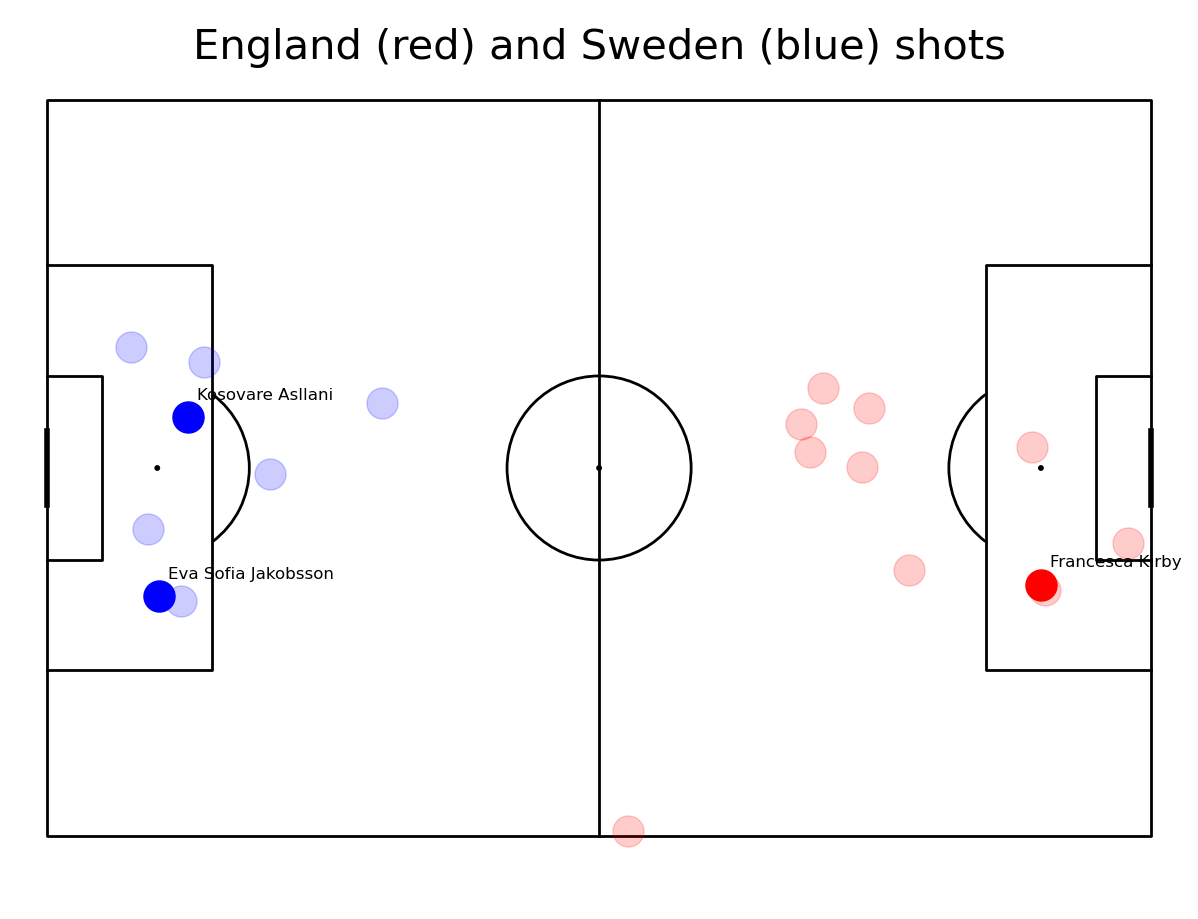

In [4]:
#create pitch
pitch = Pitch(line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

# function to plot shots
def plot_team_shots(team_name, dot_color):
   # get shots for team
   mask = (df.type_name == "Shot") & (df.team_name == team_name)
   df_team = df.loc[mask, ["x", "y", "outcome_name", "player_name"]]

   # change x and y values for team 2 so they can be plotted on the left side of the pitch
   if team_name == team2:
      df_team["x"] = 120 - df_team["x"]
      df_team["y"] = 80 - df_team["y"]

   # plot shots
   for i, row in df_team.iterrows():
      if row["outcome_name"] == "Goal":
         pitch.scatter(row.x, row.y, alpha = 1, s = 500, color = dot_color, ax = ax["pitch"])
         pitch.annotate(row["player_name"], (row.x + 1, row.y - 2), ax = ax["pitch"], fontsize = 12)
      else:
         pitch.scatter(row.x, row.y, alpha = 0.2, s = 500, color = dot_color, ax = ax["pitch"])

plot_team_shots(team1, "red")
plot_team_shots(team2, "blue")

# add title
fig.suptitle("England (red) and Sweden (blue) shots", fontsize = 30)
plt.show()

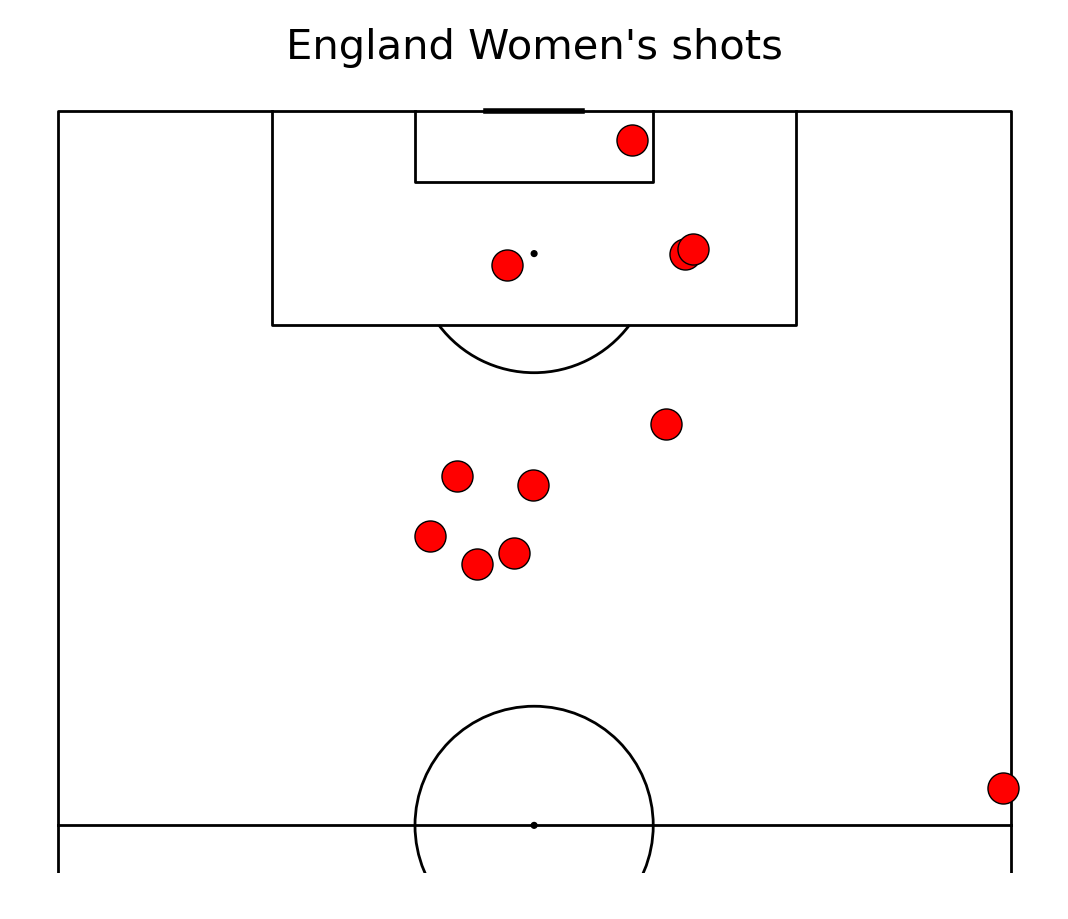

In [5]:
# create half pitch
pitch = VerticalPitch(line_color='black', half = True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

# function to plot shots
def plot_team_shots_half(team_name, dot_color):
   # get shots for team
   mask = (df.type_name == "Shot") & (df.team_name == team_name)
   df_team = df.loc[mask, ["x", "y", "outcome_name", "player_name"]]

   # plot shots
   pitch.scatter(df_team["x"], df_team["y"], alpha = 1, s = 500, color = dot_color, ax = ax["pitch"], edgecolors="black")
   fig.suptitle(f"{team_name} shots", fontsize = 30)

plot_team_shots_half(team1, "red")
plt.show()

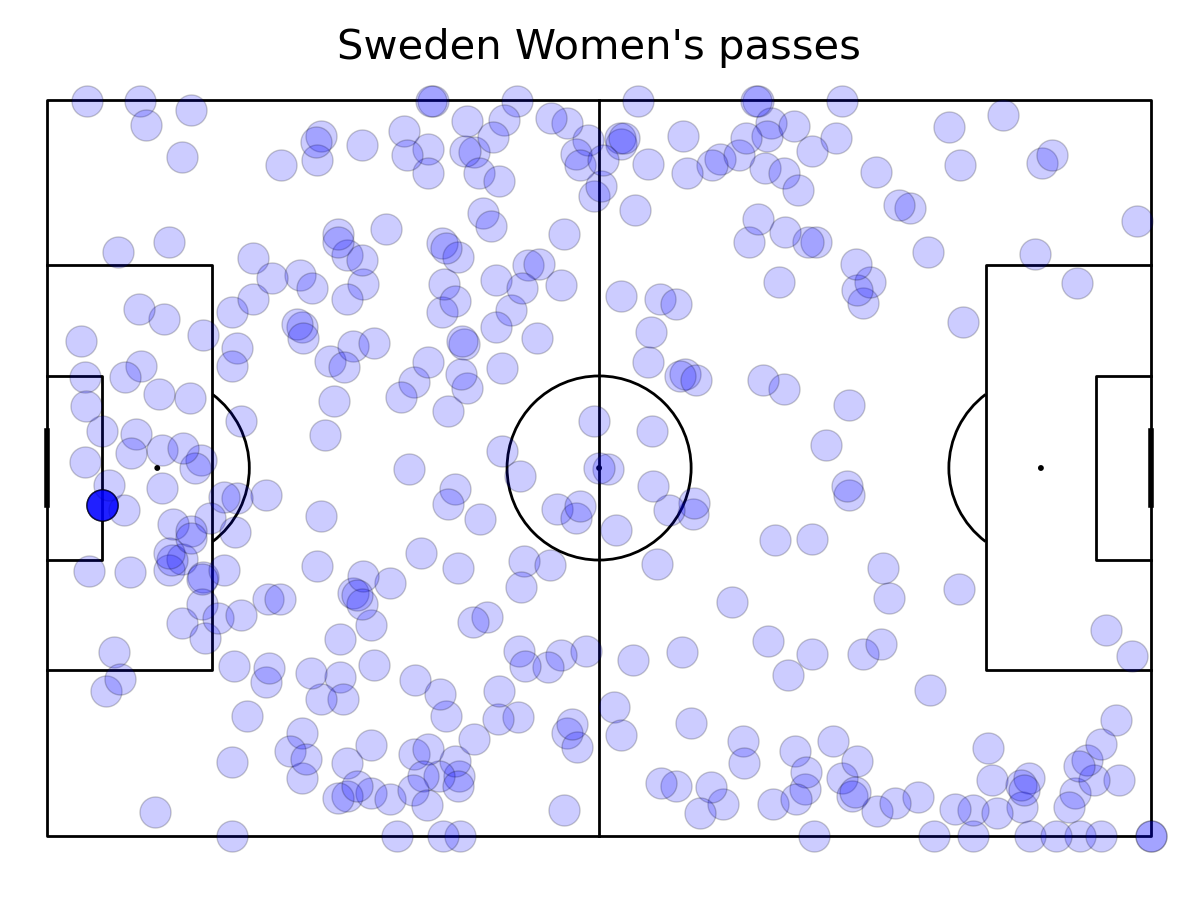

In [30]:
# CHALLENGE: PASS MAP FOR TEAM
pitch = Pitch(line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

passes_df = df.loc[(df["type_name"] == "Pass") & (df["team_name"] == team2)].set_index("id")
passes_df.head()

# plot start point of all passes
pitch.scatter(passes_df["x"], passes_df["y"], alpha=0.2, s=500, color="blue", ax=ax["pitch"], edgecolors="black")
fig.suptitle(f"{team2} passes", fontsize=30)
plt.show()



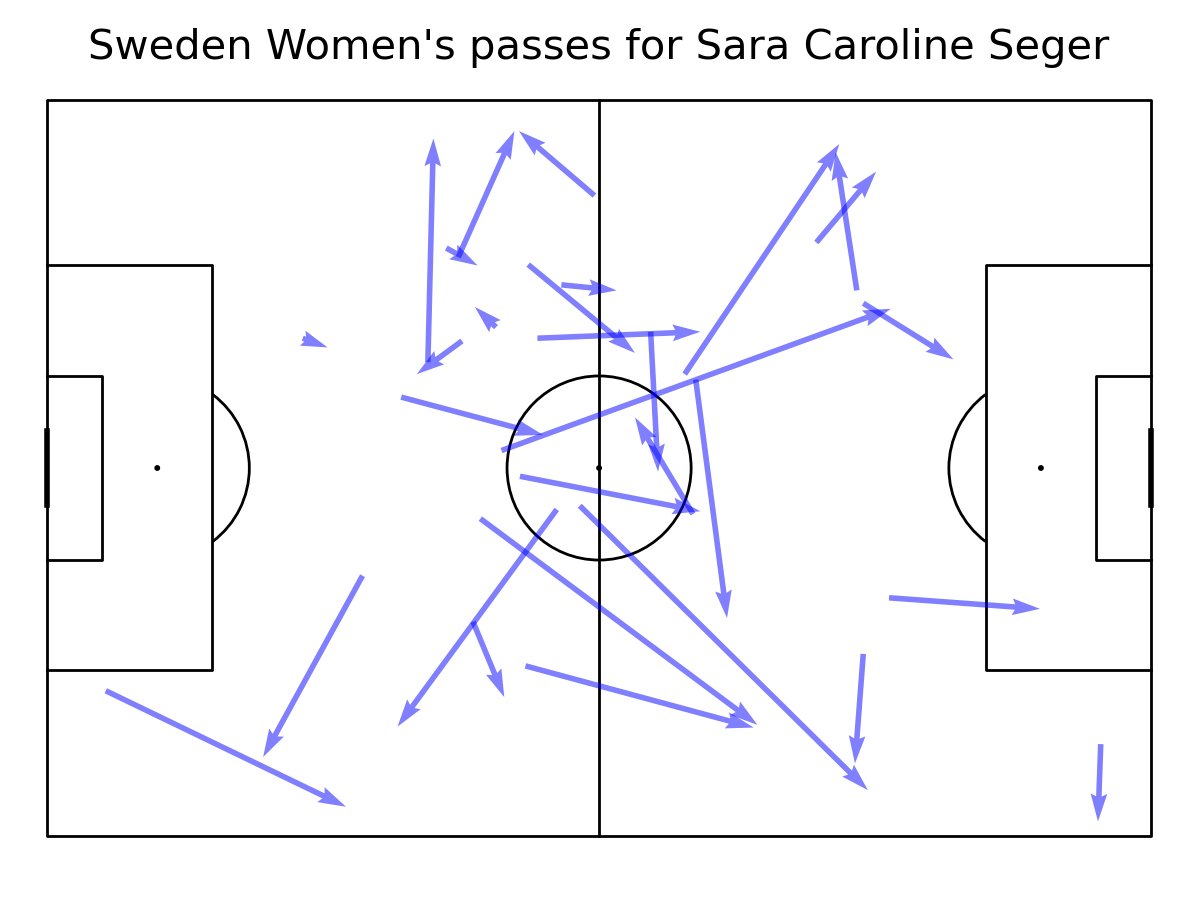

In [38]:
# CHALLENGE: PASS MAP FOR PLAYER
pitch = Pitch(line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

player_name = "Sara Caroline Seger"
passes_player_df = passes_df.loc[passes_df["player_name"] == player_name]

# plot passes
pitch.arrows(passes_player_df["x"], passes_player_df["y"], passes_player_df["end_x"], passes_player_df["end_y"], ax=ax["pitch"], color="blue", alpha=0.5)
fig.suptitle(f"{team2} passes for {player_name}", fontsize=30)
plt.show()
